In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$\text{Question: How does the correlation vary if i take samples of conditional normal distributitons centered on the line}$
$$y=\frac{1}{2}x + 5 $$
$$
$$
$\text{Script outputs a Motion picture of Scatter Plots Centered Around a Line}$
$$ $$
$\text{Correlations are done afterwarrds}$

as the conditional variance increases the correlation approaches 0

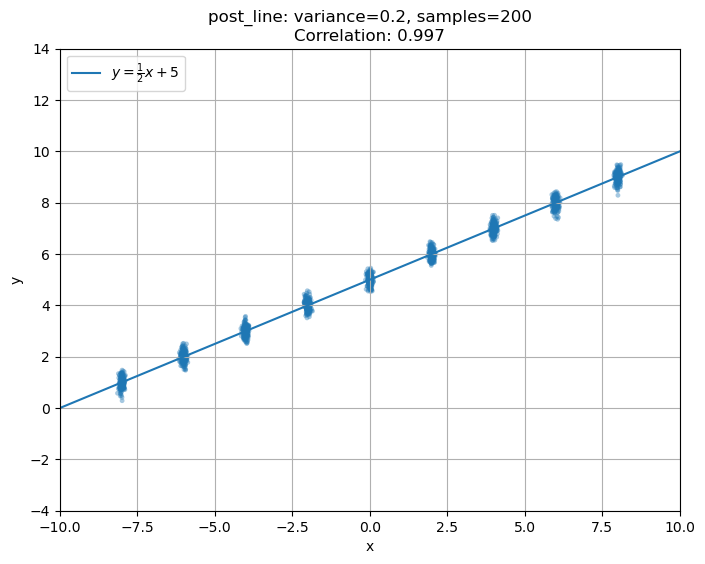

In [90]:
# Create a discrete "motion picture" that runs post_line() for a sequence of variances.
# One frame per variance value, saved as a GIF.
#
# - Uses matplotlib only (no seaborn), a single figure animated over frames.
# - Does not set explicit colors.
# - Produces /mnt/data/post_line_sequence.gif and displays the path.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# ----------------------- Parameters -----------------------
VARIANCES = [1/5, 1/3, 0.5, 1, 2, 3, 5, 8, 13, 55]
N_SAMPLES = 200
X_VALUES = np.arange(-8, 10, 2)   # columns where we draw conditional clouds
JITTER_SD = 0.05                  # small horizontal jitter for visibility
FPS = 0.5                         # frames per second (slow enough to see each step)
OUTPUT_PATH = "post_line_sequence.gif"
# ----------------------------------------------------------

# Deterministic line: y = 0.5x + 5
x_line = np.linspace(-10, 10, 200)

def feed_line(dic):

    if dic['func'] == 'sin':
        y_line = np.sin(x_line)
        means_per_point = np.sin(np.repeat(X_VALUES, N_SAMPLES))
        label = r"$y=\sin{x}$"
    elif dic['func']=='lin':
        y_line = 0.5 * x_line + 5
        means_per_point = 0.5 * np.repeat(X_VALUES, N_SAMPLES) + 5
        label = r"$y=\frac{1}{2}x + 5$"
    
    # Precompute static x points (with jitter) and their conditional means
    rng = np.random.default_rng(123)
    x_points = np.repeat(X_VALUES, N_SAMPLES).astype(float)
    x_points = x_points + rng.normal(0, JITTER_SD, size=x_points.shape[0])
    
    # Helper for correlation
    def corrcoef_xy(x, y):
        if x.size < 2:
            return np.nan
        return float(np.corrcoef(x, y)[0, 1])
    
    # Set up the figure and the static line
    fig, ax = plt.subplots(figsize=(8, 6))
    (line_handle,) = ax.plot(x_line, y_line, label=label)
    
    # Initial scatter (will be updated each frame using the current variance)
    initial_sigma = VARIANCES[0]
    y_points = rng.normal(loc=means_per_point, scale=initial_sigma, size=means_per_point.shape[0])
    sc = ax.scatter(x_points, y_points, s=12, alpha=0.4, edgecolors="none")
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y_line.min(), 0.5 * X_VALUES.min() + 5) - 4, max(y_line.max(), 0.5 * X_VALUES.max() + 5) + 4)
    ax.set_title(f"post_line: variance={initial_sigma}, samples={N_SAMPLES}\nCorrelation: {corrcoef_xy(x_points, y_points):.3f}")
    
    # Update function: one frame per variance value
    def update(frame_idx):
        sigma = VARIANCES[frame_idx]
        y_new = rng.normal(loc=means_per_point, scale=sigma, size=means_per_point.shape[0])
        sc.set_offsets(np.column_stack([x_points, y_new]))
        ax.set_title(f"post_line: variance={sigma}, samples={N_SAMPLES}\nCorrelation: {corrcoef_xy(x_points, y_new):.3f}")
        return (sc,)
    ax.legend(loc="upper left")
    fig.canvas.draw()   
    ani = FuncAnimation(fig, update, frames=len(VARIANCES), interval=int(1000 / FPS), blit=False)
    
    # Save out as GIF
    writer = PillowWriter(fps=FPS)
    ani.save(OUTPUT_PATH, writer=writer)
    
    plt.close(fig)
    
    OUTPUT_PATH


feed_line({'func': 'lin'})

In [87]:
# def post_line(variance, N_samples):
#     # --- Script A (original line) ---
#     x = np.linspace(-10, 10, 200)
#     # y = 0.5 * x + 5
#     y = np.exp(np.imag(x))
    
#     plt.figure(figsize=(8,6))
#     plt.plot(x, y, label=r"$y=\frac{1}{2}x + 5$")
#     plt.xlabel("x")
#     plt.ylabel("y")

#     plt.axhline(0, color="black", linewidth=0.7)  # x-axis
#     plt.axvline(0, color="black", linewidth=0.7)  # y-axis
#     plt.grid(True)
    
#     # --- Overlay: scatter samples from Y|X ~ Normal(0.5x+5, var=1) at selected x's ---
#     rng = np.random.default_rng(42)
#     x_values = np.arange(-8, 10, 2)
#     n_samples_per_x = N_samples
#     jitter_sd = 0.05  # small horizontal jitter so points don't perfectly overlap
    
#     dic_samples = {}
    
#     for i, xv in enumerate(x_values):
#         mean_y = 0.5 * xv + 5
#         y_samples = rng.normal(loc=mean_y, scale=variance, size=n_samples_per_x)
#         # dic_samples[xv] = y_samples, [xv for i in range(n_samples_per_x)]
#         dic_samples[xv] = y_samples

#         ## add the distribution of the jitter
#         x_samples = np.full(n_samples_per_x, xv) + rng.normal(0, jitter_sd, n_samples_per_x)
#         label = "Samples of $Y|X\\sim\\mathcal{N}(0.5x+5,1)$" if i == 0 else None
#         # label += f'\nCorrelation: {correlation}'
#         plt.scatter(x_samples, y_samples, s=12, alpha=0.4, edgecolors="none", label=label)
#     # plt.xlabel([i for i in range(-10, 12, 2)])
#     plt.legend()
#     #### melt some dataframes
#     df = pd.DataFrame(dic_samples)
#     df = pd.melt(df, var_name='x')
#     correlation = np.corrcoef(df['x'], df['value'])[0,1]
#     plt.title("Line and Conditional Distributions: y = (1/2)x + 5" + f'\nVariance: {np.round(variance, 5)}, Correlation: {np.round(correlation, 5)}')
    
#     plt.show()
#     print(correlation)



# for n in [1/5, 1/3, 0.5, 1, 2, 3, 5, 8, 13, 55]:
#     post_line(variance=n, N_samples=200)

In [86]:
### Given a vector X and a vector Y how does the co-variance and correlation vary?

0.1

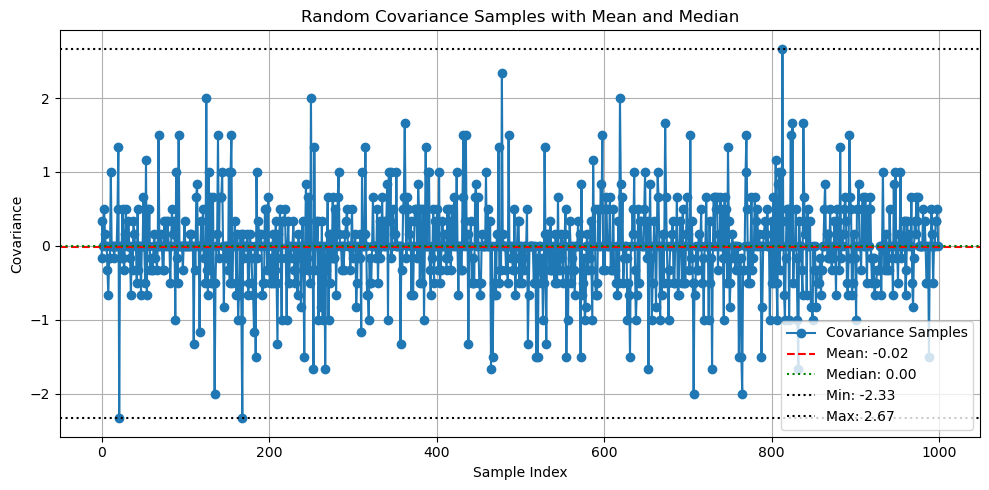

In [104]:
import numpy as np
import matplotlib.pyplot as plt

def random_covariance():
    X = np.random.binomial(p=0.5, n=5, size=3)
    Y = np.random.binomial(p=0.5, n=2, size=3)
    Cov = np.cov(X, Y)
    Covariance = Cov[0][1]
    return Covariance






N_Samples = 1000

# Generate samples
samples = [random_covariance() for _ in range(N_Samples)]

# Compute statistics
mean_val = np.mean(samples)
median_val = np.median(samples)
min_val = np.min(samples)
max_val = np.max(samples)


# Plot the samples
plt.figure(figsize=(10, 5))
plt.plot(samples, marker='o', label='Covariance Samples')

# Add horizontal lines for mean and median
plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axhline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
plt.axhline(min_val, color='black', linestyle=':', label=f'Min: {min_val:.2f}')
plt.axhline(max_val, color='black', linestyle=':', label=f'Max: {max_val:.2f}')

# Labels and legend
plt.title("Random Covariance Samples with Mean and Median")
plt.xlabel("Sample Index")
plt.ylabel("Covariance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


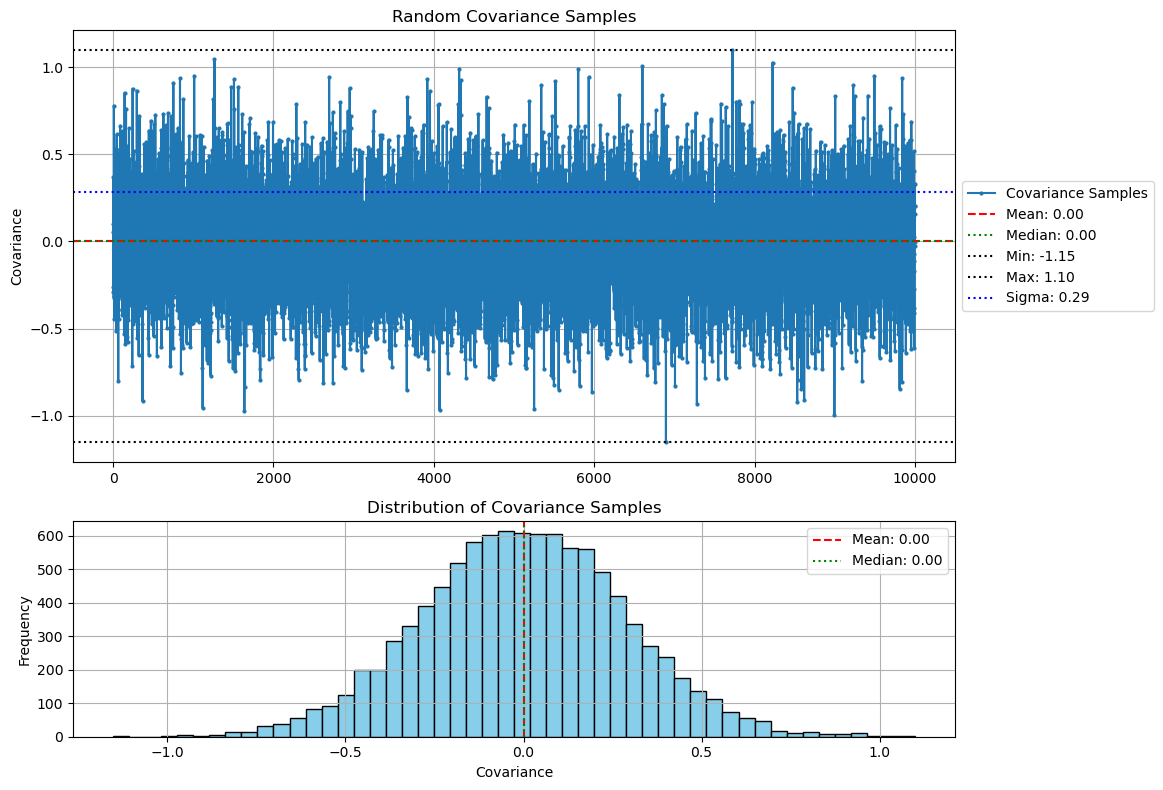

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def random_covariance_norm():
    X = np.random.normal(loc=0, scale=1, size=100)
    Y = np.random.normal(loc=0, scale=1000, size=100)
    Cov = np.cov(X, Y)
    Covariance = Cov[0][1]
    return Covariance


def random_covariance_binom():
    X = np.random.binomial(p=0.9, n=100, size=100)
    Y = np.random.binomial(p=0.1, n=10, size=100)
    Cov = np.cov(X, Y)
    Covariance = Cov[0][1]
    return Covariance



N_Samples = 10000

# Generate samples
samples = [random_covariance_binom() for _ in range(N_Samples)]

# Compute statistics
mean_val = np.mean(samples)
median_val = np.median(samples)
min_val = np.min(samples)
max_val = np.max(samples)
std_val = np.std(samples)

# Create subplot layout: (2 rows, 1 column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=False, gridspec_kw={'height_ratios': [2, 1]})

# --- Top Plot: Line Plot of Covariances ---
ax1.plot(samples, marker='o', linestyle='-', markersize=2, label='Covariance Samples')
ax1.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
ax1.axhline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
ax1.axhline(min_val, color='black', linestyle=':', label=f'Min: {min_val:.2f}')
ax1.axhline(max_val, color='black', linestyle=':', label=f'Max: {max_val:.2f}')
ax1.axhline(std_val, color='blue', linestyle=':', label=f'Sigma: {std_val:.2f}')

ax1.set_title("Random Covariance Samples")
ax1.set_ylabel("Covariance")
ax1.grid(True)

# Move legend outside the plot
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# --- Bottom Plot: Histogram of Covariances ---
ax2.hist(samples, bins=50, color='skyblue', edgecolor='black')
ax2.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
ax2.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
ax2.set_title("Distribution of Covariance Samples")
ax2.set_xlabel("Covariance")
ax2.set_ylabel("Frequency")
ax2.grid(True)

# Legend for histogram
ax2.legend(loc='upper right')

# Adjust layout to make room for external legend
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Give room for the top legend outside the plot

plt.show()
